# Reading a Correlation Heatmap

## Auto Dataset
Gas mileage, horsepower, and other information for 392 vehicles.

A data frame with 392 observations on the following 9 variables.

- mpg: miles per gallon
- cylinders: Number of cylinders between 4 and 8
- displacement: Engine displacement (cu. inches)
- horsepower: Engine horsepower
- weight: Vehicle weight (lbs.)
- acceleration: Time to accelerate from 0 to 60 mph (sec.)
- year: Model year (modulo 100)
- origin: Origin of car (1. American, 2. European, 3. Japanese)
- name: Vehicle name

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [10]:
auto_df  = pd.read_csv('Auto.csv')
auto_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [11]:
describe_df = auto_df.describe().transpose()
describe_df

,count,mean,std,min,25%,50%,75%,max
mpg,397.0,23.515869,7.825804,9.0,17.5,23.0,29.0,46.6
cylinders,397.0,5.458438,1.701577,3.0,4.0,4.0,8.0,8.0
displacement,397.0,193.532746,104.379583,68.0,104.0,146.0,262.0,455.0
weight,397.0,2970.261965,847.904119,1613.0,2223.0,2800.0,3609.0,5140.0
acceleration,397.0,15.555668,2.749995,8.0,13.8,15.5,17.1,24.8
year,397.0,75.994962,3.690005,70.0,73.0,76.0,79.0,82.0
origin,397.0,1.574307,0.802549,1.0,1.0,1.0,2.0,3.0


In [12]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [13]:
# horsepower is registered as object type

# testing if there are any values that aren't numbers
auto_df.loc[~auto_df.horsepower.apply(lambda x: x.isnumeric())]


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i


In [14]:
# For now i will change "?" for None

auto_df['horsepower'] = pd.to_numeric(auto_df['horsepower'].replace('?', None))
auto_df.loc[auto_df.horsepower.isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i


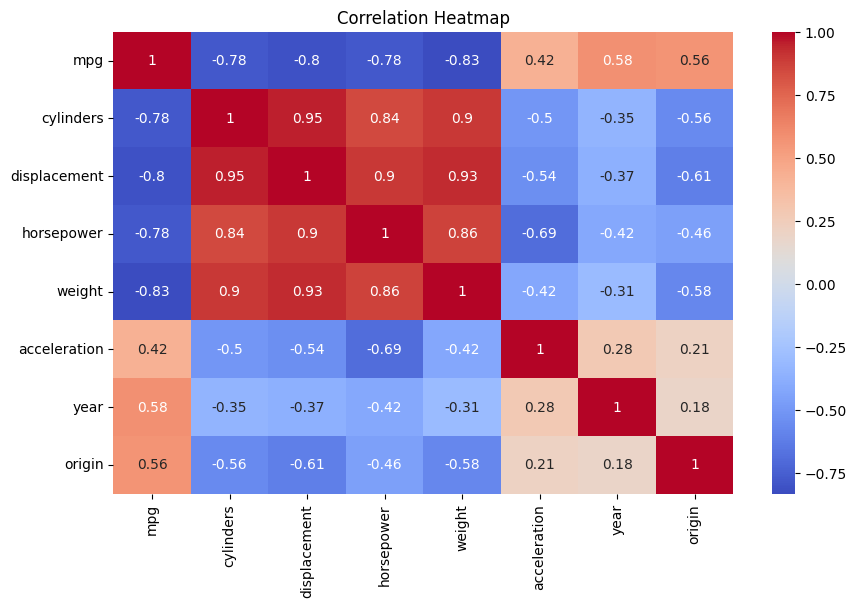

In [15]:
# Correlation between all the numerical columns
plt.figure(figsize=(10, 6))
sns.heatmap(auto_df.iloc[:, :-1].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

As we can see, cylinders, displacement, horsepower and weight have negative correlation with mpg, that means increasing these variables will decrease mpg.

In constrast, weight and displacement have positive correlation with horsepower, that means increasing these variables will increase horsepower.

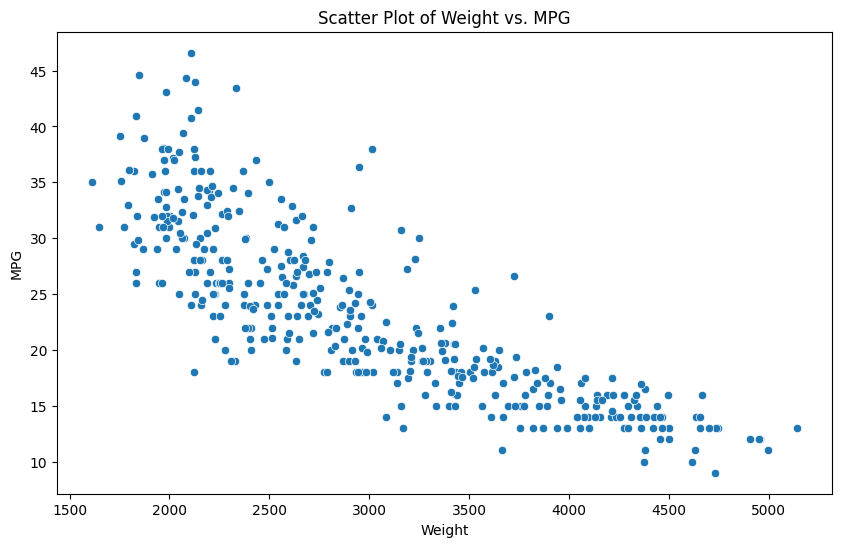

In [16]:
# Relationship between Weight and MPG
plt.figure(figsize=(10, 6))
sns.scatterplot(x='weight', y='mpg', data=auto_df)
plt.title('Scatter Plot of Weight vs. MPG')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.show()

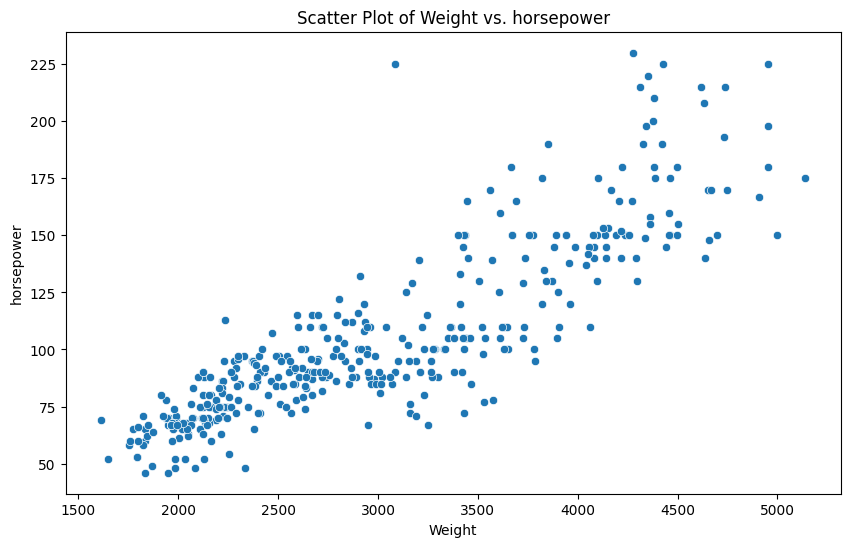

In [18]:
# Relationship between Weight and MPG
plt.figure(figsize=(10, 6))
sns.scatterplot(x='weight', y='horsepower', data=auto_df)
plt.title('Scatter Plot of Weight vs. horsepower')
plt.xlabel('Weight')
plt.ylabel('horsepower')
plt.show()

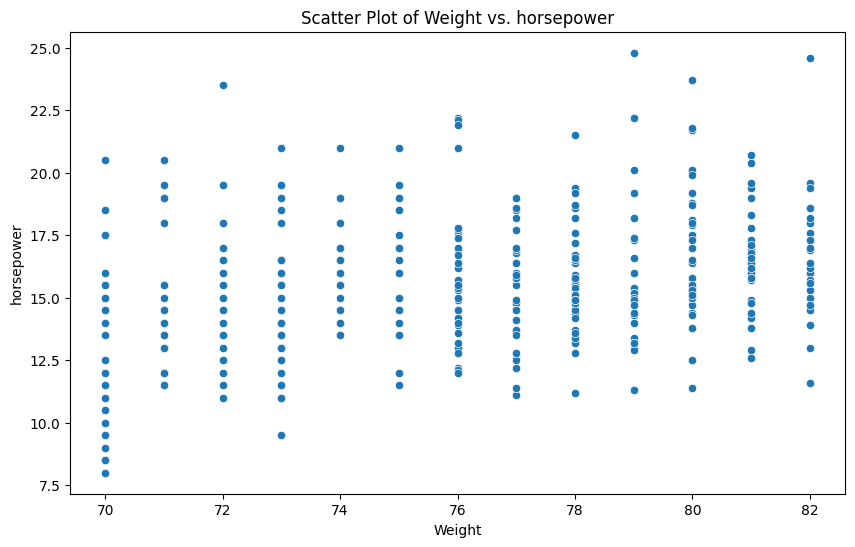

In [23]:
# Relationship between Weight and MPG
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='acceleration', data=auto_df)
plt.title('Scatter Plot of Weight vs. horsepower')
plt.xlabel('Weight')
plt.ylabel('horsepower')
plt.show()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)